In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
%matplotlib inline

In [4]:
data=pd.read_csv('Advertising.csv',index_col=0)
data.columns=['TV','Radio','Newspaper','Sales']
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
data.shape

(200, 4)

<Axes: xlabel='Newspaper', ylabel='Sales'>

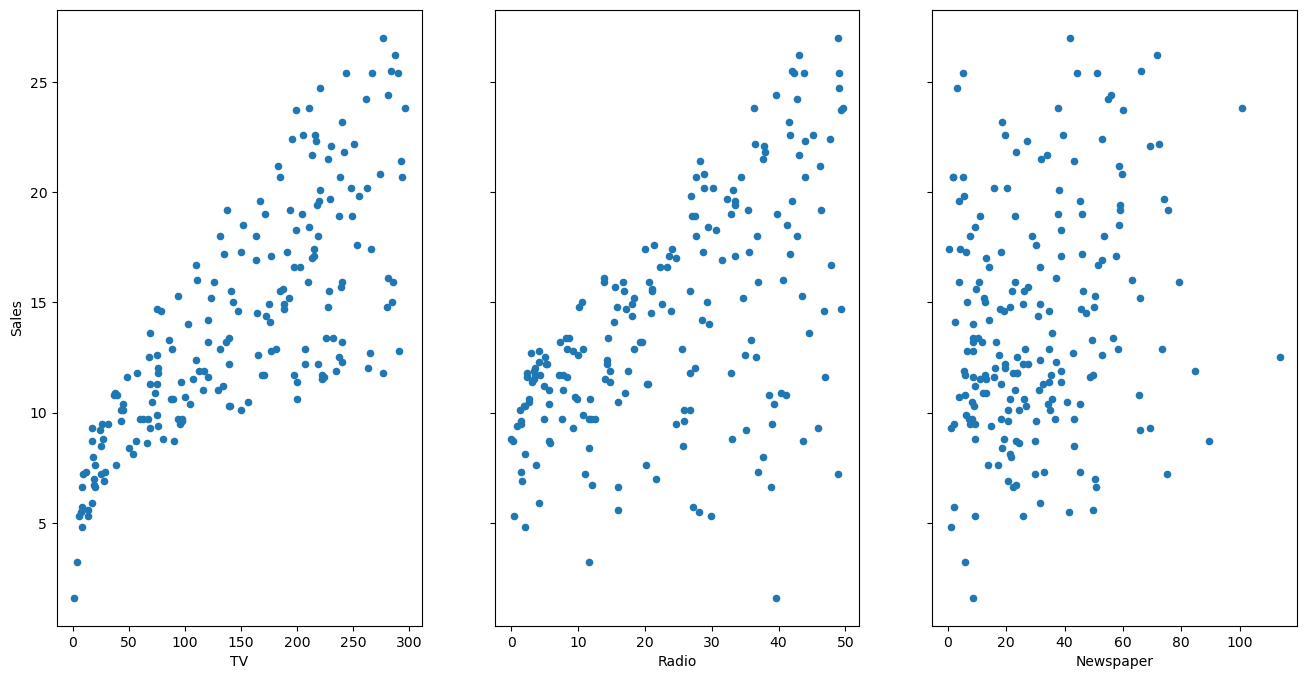

In [6]:
fig,axs=plt.subplots(1,3,sharey=True)
data.plot(kind='scatter',x='TV',y='Sales',ax=axs[0],figsize=(16,8))
data.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1])
data.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2])

In [62]:
feature_cols=['TV']
x=data[feature_cols]
y=data.Sales

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [64]:
print(lm.intercept_)
print(lm.coef_)

7.239459830751138
[0.0464078]


In [65]:
prediction=lm.predict(x_test)
prediction

array([14.81785392, 16.30754437, 20.83230507,  7.78243112, 17.46309864,
       10.72468577, 17.30067133,  9.55984994, 17.56055502, 15.36546598,
        8.7013056 ,  9.84757831, 18.12208943,  7.49006196, 13.71334823,
       15.13806775,  7.57823679, 16.40964153, 10.73396733, 18.25667206,
       17.89005042, 10.38590882,  9.00295631, 18.88317738, 10.44159818,
        9.72227724, 17.14752559, 13.70406667, 11.28622018,  7.62928537,
       16.5117387 , 10.45087974, 16.46997167,  8.02375169, 20.26612989,
       18.2937983 ,  9.48095667, 19.94127527, 12.67845424,  8.51567439,
       12.62276488, 15.45364081,  9.2396361 , 10.1306659 , 17.63480751,
        9.01223787, 10.51585066, 14.07532908, 12.09371593, 10.78037513,
       10.86854996, 15.05453371,  7.64320771,  7.60144069, 10.78501591,
       13.24462943, 10.64579251, 20.68380011,  8.14905275, 16.40964153])

In [66]:
print(sqrt(mean_squared_error(ytest,prediction)))

2.9951613049072354


In [50]:
x_new=pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
lm.predict(x_new)

array([ 7.27194529, 20.99473238])

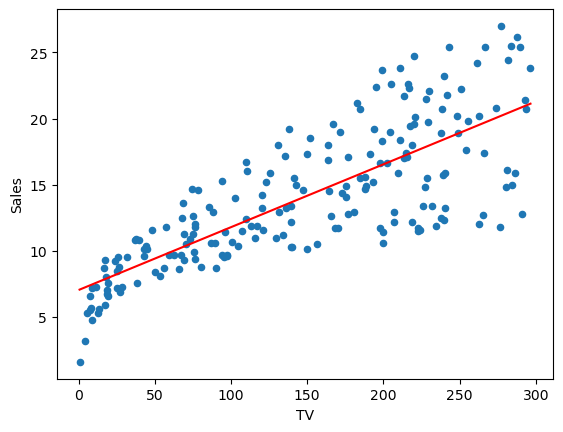

In [51]:
data.plot(kind='scatter',x='TV',y='Sales')
plt.plot(x_new,preds,c='red')

In [77]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='Sales ~ TV',data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           1.47e-42
Time:                        13:58:48   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
print(lm.pvalues)
print(lm.conf_int())
print(lm.rsquared)

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64
                  0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843
0.611875050850071


In [71]:
feature_cols=['TV','Radio','Newspaper']
x=data[feature_cols]
y=data.Sales

In [72]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,test_size=0.3,random_state=42)
lm=LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

In [73]:
print(lm.intercept_)
print(lm.coef_)

2.7089490925159048
[0.04405928 0.1992875  0.00688245]


In [74]:
predictions=lm.predict(xtest)
predictions

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [76]:
print(sqrt(mean_squared_error(ytest,predictions)))

1.9485372043446383


In [47]:
lm=smf.ols(formula='Sales~ TV+ Radio + Newspaper',data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           1.58e-96
Time:                        21:05:40   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
print(lm.pvalues)
print(lm.conf_int())
print(lm.rsquared)

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64
                  0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843
0.611875050850071
